1. estimating conditional probabilities and Baye's theorem
2. Bayes' theorem, and Kolmogorov-Smirnov tests, for distribution comparison. 
3. Implement data transformation techniques, such as the Box-Cox and Yeo-Johnson transformations

## Initial Data Analysis

check the dimensionality of the data, 
type of columns,
possible missing values,
and some generic statistics on the numerical columns.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('Absenteeism_at_work_AAA/Absenteeism_at_work.csv',sep=";")
#without sep it will not give correct format

In [3]:
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [4]:
# data2 = pd.read_excel('Absenteeism_at_work_AAA/Absenteeism_at_work.xls')
# data2

In [5]:
"""
print dimensionality of the data, columns, types and missing values
"""

print(f"Data dimesnion:{data.shape}")
for col in data.columns:
    print(f"Column:{col:35} | type: {str(data[col].dtype):7} | missing values:{data[col].isna().sum():3d}")

Data dimesnion:(740, 21)
Column:ID                                  | type: int64   | missing values:  0
Column:Reason for absence                  | type: int64   | missing values:  0
Column:Month of absence                    | type: int64   | missing values:  0
Column:Day of the week                     | type: int64   | missing values:  0
Column:Seasons                             | type: int64   | missing values:  0
Column:Transportation expense              | type: int64   | missing values:  0
Column:Distance from Residence to Work     | type: int64   | missing values:  0
Column:Service time                        | type: int64   | missing values:  0
Column:Age                                 | type: int64   | missing values:  0
Column:Work load Average/day               | type: float64 | missing values:  0
Column:Hit target                          | type: int64   | missing values:  0
Column:Disciplinary failure                | type: int64   | missing values:  0
Column:Educatio

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
Reason for absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
Month of absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
Day of the week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
Seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


some of the columns, such as Month of absence, Day of the week, Seasons, Education, Disciplinary failure, Social drinker, and Social smoker, are encoding categorical values.

We will perform the transformation by defining a Python dict object containing the mapping and then applying the apply() function to each feature, which applies the provided function to each of the values in the column

In [7]:
# define encoding dictionaries
month_encoding = {1: "January", 2: "February", 3: "March", 4: "April", 
    5: "May", 6: "June", 7: "July", 8: "August", 
    9: "September", 10: "October", 11: "November", 12: "December", 0: "Unknown"}
dow_encoding = {2: "Monday", 3: "Tuesday", 4: "Wednesday", 5: "Thursday", 6: "Friday"}
season_encoding = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
education_encoding = {1: "high_school", 2: "graduate", 3: "postgraduate", 4: "master_phd"}
yes_no_encoding = {0: "No", 1: "Yes"}


In [8]:
# backtransform numerical variables to categorical
preprocessed_data = data.copy()
preprocessed_data["Month of absence"] = preprocessed_data["Month of absence"]\
    .apply(lambda x: month_encoding[x]) 
preprocessed_data["Day of the week"] = preprocessed_data["Day of the week"]\
    .apply(lambda x: dow_encoding[x]) 
preprocessed_data["Seasons"] = preprocessed_data["Seasons"]\
    .apply(lambda x: season_encoding[x]) 
preprocessed_data["Education"] = preprocessed_data["Education"]\
    .apply(lambda x: education_encoding[x]) 
preprocessed_data["Disciplinary failure"] = preprocessed_data["Disciplinary failure"]\
    .apply(lambda x: yes_no_encoding[x]) 
preprocessed_data["Social drinker"] = preprocessed_data["Social drinker"]\
    .apply(lambda x: yes_no_encoding[x]) 
preprocessed_data["Social smoker"] = preprocessed_data["Social smoker"]\
    .apply(lambda x: yes_no_encoding[x]) 

In [9]:
preprocessed_data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,July,Tuesday,Spring,289,36,13,33,239.554,...,No,high_school,2,Yes,No,1,90,172,30,4
1,36,0,July,Tuesday,Spring,118,13,18,50,239.554,...,Yes,high_school,1,Yes,No,0,98,178,31,0
2,3,23,July,Wednesday,Spring,179,51,18,38,239.554,...,No,high_school,0,Yes,No,0,89,170,31,2
3,7,7,July,Thursday,Spring,279,5,14,39,239.554,...,No,high_school,2,Yes,Yes,0,68,168,24,4
4,11,23,July,Thursday,Spring,289,36,13,33,239.554,...,No,high_school,2,Yes,No,1,90,172,30,2


In [10]:
preprocessed_data.head().T

,0,1,2,3,4
ID,11,36,3,7,11
Reason for absence,26,0,23,7,23
Month of absence,July,July,July,July,July
Day of the week,Tuesday,Tuesday,Wednesday,Thursday,Thursday
Seasons,Spring,Spring,Spring,Spring,Spring
Transportation expense,289,118,179,279,289
Distance from Residence to Work,36,13,51,5,36
Service time,13,18,18,14,13
Age,33,50,38,39,33
Work load Average/day,239.554,239.554,239.554,239.554,239.554


### Identifying Reasons for Absence

In [11]:
"""
create a new variable, called Disease, which indicates whether a specific reason for absence is present in the ICD table or not

"""

# define a function that returns Yes if a provided encoded value is contained in the ICD (values 1 to 21); otherwise, No:

def in_icd(val):

    return "Yes" if val >= 1 and val <= 21 else "No"

In [12]:
# Combine the .apply() method with the previously defined in_icd() function in order to create the new Disease column in the preprocessed dataset

preprocessed_data["Disease"] = preprocessed_data["Reason for absence"].apply(in_icd)

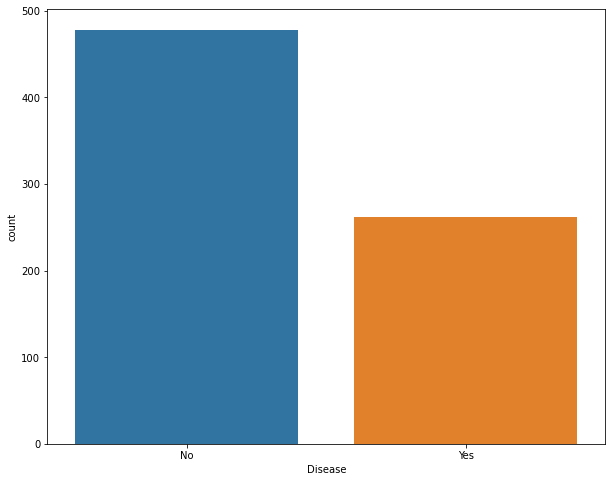

In [13]:
# applying bar plots to compare absences due to reasons present in icd

plt.figure(figsize=(10, 8))

sns.countplot(data=preprocessed_data, x='Disease')

plt.savefig('figs/disease_plot.png', format='png', dpi=300)

### Initial Analysis of the Reason for Absence

simple analysis of the Reason for absence column. We will try to address questions such as, what is the most common reason for absence? Does being a drinker or smoker have some effect on the causes? Does the distance to work have some effect on the reasons?

*overall distribution of the absence reasons in the data—that is, how many entries we have for a specific reason for absence in our dataset.*

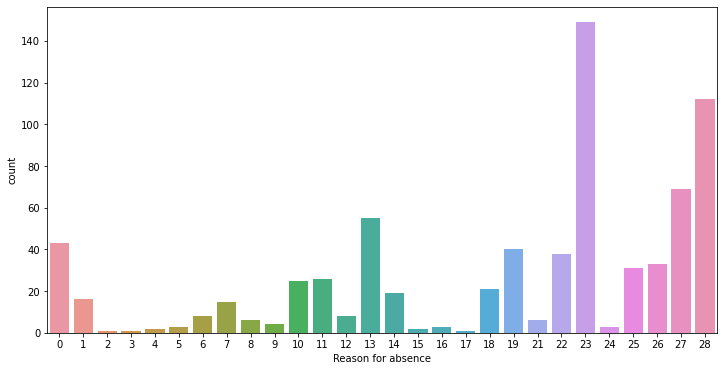

In [14]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=preprocessed_data, x = "Reason for absence")
ax.set_ylabel = ("number of entries for each category of absence")
plt.savefig('figs/number_of_absence_for_each_reason.png', format='png' , dpi=300)

to perform a more accurate and in-depth analysis of the data, we will investigate the impact of the various features on the Reason for absence and Absenteeism in hours columns in the following sections. 

#### Analysis of Social Drinkers and Smokers

impact of being a drinker or smoker on employee absenteeism

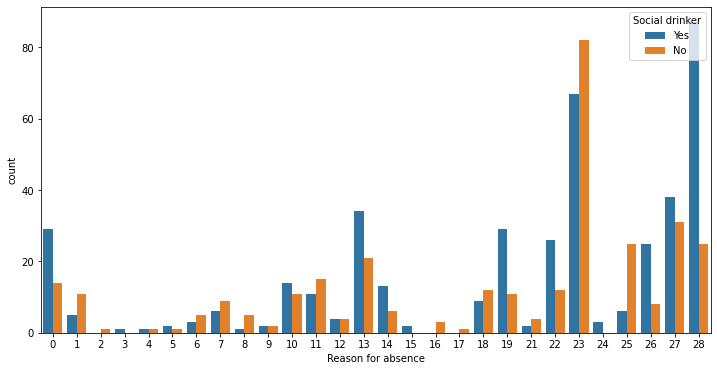

In [15]:
# plot for drinkers vs absence

plt.figure(figsize=(12,6))
ax = sns.countplot(data=preprocessed_data, x="Reason for absence", hue="Social drinker", hue_order=["Yes","No"])
plt.savefig('figs/Drinkers.png', format='png', dpi=300)



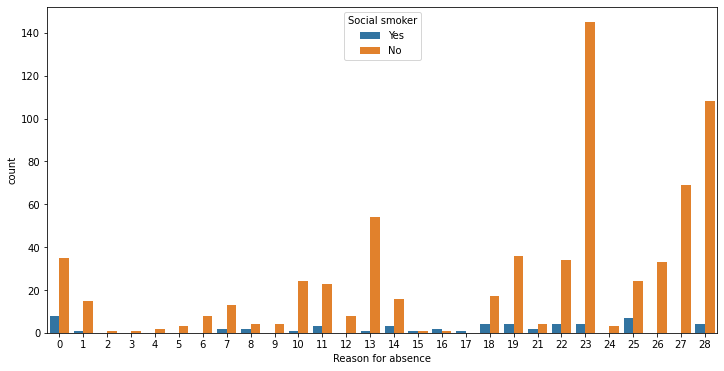

In [16]:
# plot for smokers vs absence

plt.figure(figsize=(12,6))
ax = sns.countplot(data=preprocessed_data, x="Reason for absence", hue="Social smoker", hue_order=["Yes","No"])
plt.savefig('figs/smokers.png', format='png', dpi=300)

In [17]:
#calculate the actual count for social drinkers and smokers from the preprocessed data

# use value_counts

print(preprocessed_data["Social drinker"].value_counts(normalize=True))
print(preprocessed_data["Social smoker"].value_counts(normalize=True))

Yes    0.567568
No     0.432432
Name: Social drinker, dtype: float64
No     0.927027
Yes    0.072973
Name: Social smoker, dtype: float64


**A more rigorous approach in this direction would be to analyze the conditional probabilities of the different absence reasons, which are based on being a social drinker or smoker.**

**Conditional probability:** the probability of A given B, is equal to the probability of A and B both happening, divided by the probability of B happening

Check if : reasons for absence with higher probability among smokers and drinkers.

In [18]:
"""
first compute the unconditional probabilities of being a social drinker or smoker. 
Verify that both the probabilities are greater than zero, as they appear in the denominator of the conditional probabilities.
Do this by counting the number of social drinkers and smokers and dividing these values by the total number of entries.
"""

drinker_prob = preprocessed_data["Social drinker"].value_counts(normalize=True)["Yes"]
smoker_prob = preprocessed_data["Social smoker"].value_counts(normalize=True)["Yes"]

print(f"Probability(social drinker)={drinker_prob:.3f} | Probability(social smoker)={smoker_prob:.3f}")



Probability(social drinker)=0.568 | Probability(social smoker)=0.073


**the probability of being a drinker is almost 57%, while the probability of being a smoker is quite low (only 7.3%).**

In [19]:
"""
compute the probabilities of being a social drinker/smoker and being absent for each reason of absence.
"""

# define masks in the data, which only account for entries where employees are drinkers or smokers:

drinker_mask = preprocessed_data["Social drinker"] == "Yes"
smoker_mask = preprocessed_data["Social smoker"] == "Yes"

# Compute the total number of entries and the number of absence reasons, masked by drinkers/smokers:

total_entries = preprocessed_data.shape[0]

absence_drinker_prob = preprocessed_data["Reason for absence"][drinker_mask].value_counts()/total_entries
absence_smoker_prob = preprocessed_data["Reason for absence"][smoker_mask].value_counts()/total_entries


# # compute conditional probabilities

cond_prob = pd.DataFrame(index=range(0,29)) # bco there are 29 diseases in icd table
cond_prob["P(Absence | social drinker)"] = absence_drinker_prob/drinker_prob
cond_prob["P(Absence | social smoker)"] = absence_smoker_prob/smoker_prob

<Figure size 432x288 with 0 Axes>

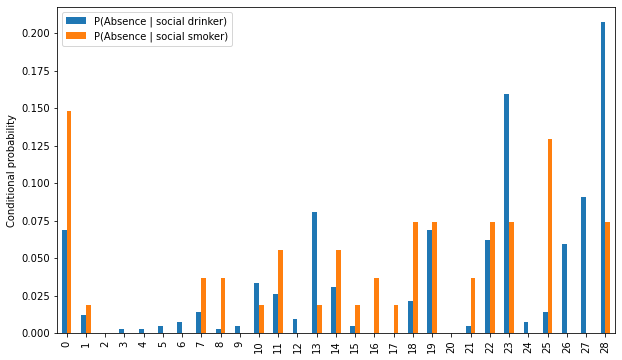

In [20]:
# plot probabilities

plt.figure()

ax = cond_prob.plot.bar(figsize=(10,6))

ax.set_ylabel("Conditional probability")

plt.savefig('figs/conditional_probabilities.png',format='png', dpi=300)

the highest reason for absence for drinkers is dental consultations (28), followed by medical consultations (23). Smokers' absences, however, are mostly due to unknown reasons (0) and laboratory examinations (25).

compute the probability of being absent and being a social smoker/drinker.

**The Kolmogorov-Smirnov test is used to determine whether two samples are statistically different from each other, i.e. whether or not they follow the same distribution.**

In [21]:
# Identifying the Probability of Being a Drinker/Smoker, Conditioned to Absence Reason

Ri is the reason for which an employee is absent
compute the probabilities of an employee being a social drinker P(social drinker |Ri), or smoker P(social smoker |Ri)

<Figure size 432x288 with 0 Axes>

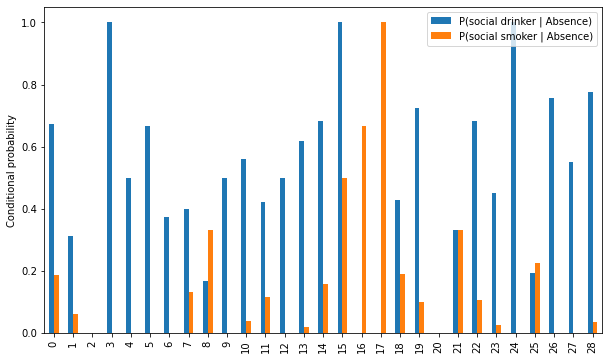

In [22]:
absence_prob = preprocessed_data["Reason for absence"].value_counts(normalize=True)

# computing the conditional probabilities for drinker and smoker

cond_prob_drinker_smoker = pd.DataFrame(index=range(0,29))
cond_prob_drinker_smoker["P(social drinker | Absence)"] = cond_prob["P(Absence | social drinker)"]*drinker_prob/absence_prob
cond_prob_drinker_smoker["P(social smoker | Absence)"] = cond_prob["P(Absence | social smoker)"]*smoker_prob/absence_prob

plt.figure()
ax = cond_prob_drinker_smoker.plot.bar(figsize=(10,6))
ax.set_ylabel("Conditional probability")
plt.savefig('figs/conditional_probability_between_smoker&drinker.png', format='png', dpi=300)


analyze the distribution of the hours of absenteeism based on the two classes (being a social drinker/smoker versus not being).

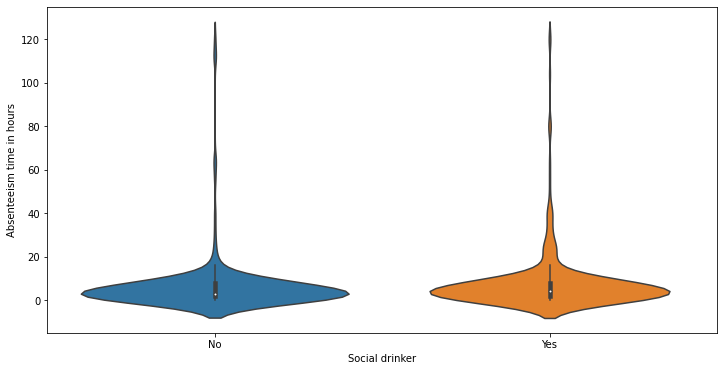

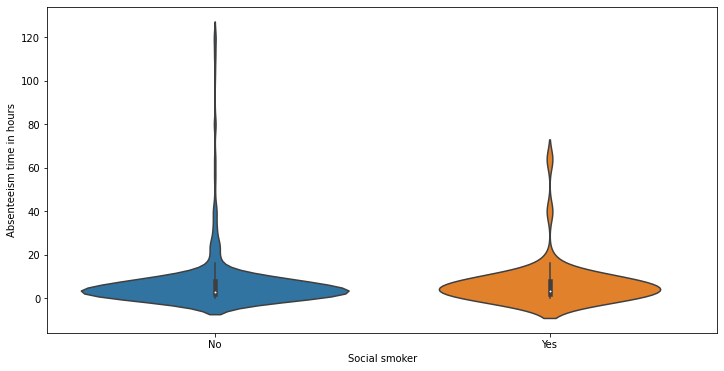

In [23]:
# create violin plots of the absenteeism time in hours

plt.figure(figsize=(12,6))
sns.violinplot(x="Social drinker", y="Absenteeism time in hours", data=preprocessed_data, order=["No","Yes"])
plt.savefig('figs/drinkers_hourly_distribution.png', format='png', dpi=300)

# now for smoker

plt.figure(figsize=(12,6))
sns.violinplot(x="Social smoker", y="Absenteeism time in hours", data=preprocessed_data, order=["No","Yes"])
plt.savefig('figs/smoker_hourly_distribution.png', format='png', dpi=300)

In [24]:
# performing null hypothesis to check if absent hurs are same for drinkers and non-drinkers

from scipy.stats import ttest_ind
hours_col = "Absenteeism time in hours"

drinkers_mask = preprocessed_data["Social drinker"] == "Yes"

hours_drinkers = preprocessed_data.loc[drinker_mask, hours_col]
hours_non_drinkers = preprocessed_data.loc[~drinker_mask, hours_col] # ~ symbol means not present in

drinkers_test = ttest_ind(hours_drinkers, hours_non_drinkers)
print(f"Statistic value: {drinkers_test[0]}, p-value:{drinkers_test[1]}")

Statistic value: 1.7713833295243993, p-value:0.07690961828294651


In [25]:
# same test on smokers

smokers_mask = preprocessed_data["Social smoker"] == "Yes"

hours_smokers = preprocessed_data.loc[smoker_mask, hours_col]
hours_non_smokers = preprocessed_data.loc[~smoker_mask, hours_col] # ~ symbol means not present in

smokers_test = ttest_ind(hours_smokers, hours_non_smokers)
print(f"Statistic value: {smokers_test[0]}, p-value:{smokers_test[1]}")

Statistic value: -0.24277795417700243, p-value:0.8082448720154971


From above 2 p-values we can say that there is **NO** statistically significant difference in the absenteeism hours between drinkers (and smokers) and non-drinkers (and non-smokers)

Perform a Kolmogorov-Smirnov test to assess the difference in the distributions of two samples

In [26]:
from scipy.stats import ks_2samp
ks_drinkers = ks_2samp(hours_drinkers, hours_non_drinkers)
ks_smokers = ks_2samp(hours_smokers, hours_non_smokers)

print(f"Drinkers comparison: statistics={ks_drinkers[0]:.3f}, \
pvalue={ks_drinkers[1]:.3f}")

print(f"Smokers comparison: statistics={ks_smokers[0]:.3f}, \
pvalue={ks_smokers[1]:.3f}")

Drinkers comparison: statistics=0.135, pvalue=0.002
Smokers comparison: statistics=0.104, pvalue=0.607


**The p-value for the drinkers dataset is lower than the critical 0.05, which is strong evidence against the null hypothesis of the two distributions being equal. On the other hand, as the p-value for the smokers dataset is higher than 0.05, you cannot reject the null hypothesis.**

### Age and Education Factors contribution to employees being absent

create a regression plot, in which we'll plot the Age column on the x axis and Absenteeism time in hours on the y axis.
include the Pearson's correlation coefficient and its p-value, where the null hypothesis is that the correlation coefficient between the two features is equal to zero

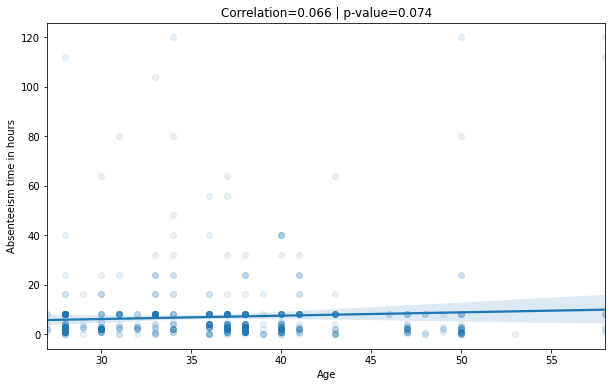

In [27]:
from scipy.stats import pearsonr

# compute Pearson's correlation coefficient and p-value

pearson_test = pearsonr(preprocessed_data["Age"],preprocessed_data["Absenteeism time in hours"])

"""

create regression plot and add correlation coefficient in the title

"""

plt.figure(figsize=(10, 6))

ax = sns.regplot(x="Age", y="Absenteeism time in hours", data=preprocessed_data, scatter_kws={"alpha":0.1})

ax.set_title(f"Correlation={pearson_test[0]:.03f} | p-value={pearson_test[1]:.03f}")

plt.savefig('figs/correlation_age_hours.png',format='png', dpi=300)

create a violin plot between the Age and Disease features. This will give you your first insight into the relationship between the two columns

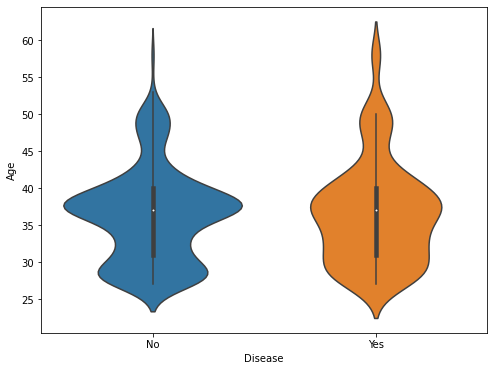

In [28]:
# create violin plot between the Age and Disease columns

plt.figure(figsize=(8,6))

sns.violinplot(x="Disease", y="Age", data=preprocessed_data)

plt.savefig('figs/Age VS disease.png', \

            format='png', dpi=300)

In [29]:
"""

get Age entries for employees with Disease == Yes and Disease == No

"""

disease_mask = preprocessed_data["Disease"] == "Yes"

disease_ages = preprocessed_data["Age"][disease_mask]

no_disease_ages = preprocessed_data["Age"][~disease_mask]

# perform hypothesis test for equality of means

test_res = ttest_ind(disease_ages, no_disease_ages)

print(f"Test for equality of means:statistic={test_res[0]:0.3f}, pvalue={test_res[1]:0.3f}")

# test equality of distributions via Kolmogorov-Smirnov test

ks_res = ks_2samp(disease_ages, no_disease_ages)

print(f"KS test for equality of distributions:statistic={ks_res[0]:0.3f}, pvalue={ks_res[1]:0.3f}")

Test for equality of means:statistic=0.630, pvalue=0.529
KS test for equality of distributions:statistic=0.057, pvalue=0.619


**there is no statistically significant difference between the two distributions. Thus, age is neither an indicator for the length of an absence nor for its type.**

In [30]:
# investigate the relationship between age and reason for absence

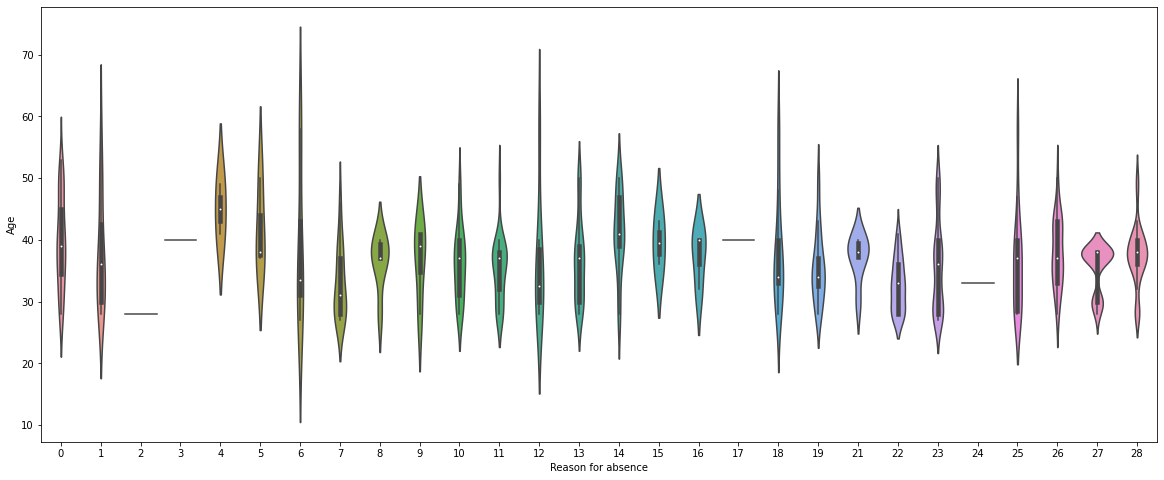

In [31]:
# violin plot of reason for absence vs age

plt.figure(figsize=(20,8))

sns.violinplot(x="Reason for absence", y="Age",data=preprocessed_data)

plt.savefig('figs/age VS reason for absence.png', format='png')

### Temporal Factors

In [32]:
# analyze the impact of the Day of the week and Month of absence columns, and their impact on the employees' absenteeism.

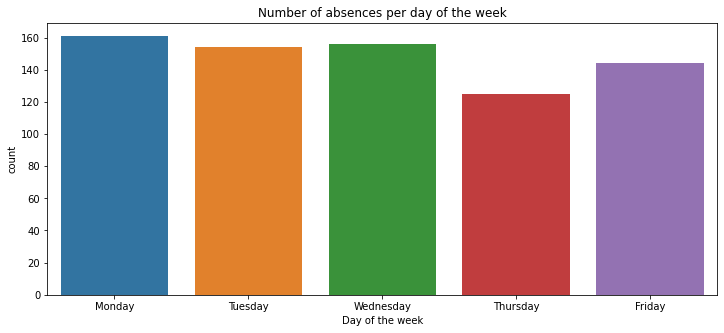

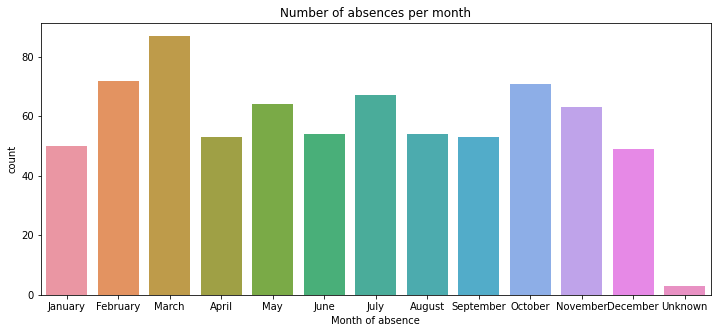

In [33]:
plt.figure(figsize=(12, 5))

ax = sns.countplot(data=preprocessed_data, \

                   x='Day of the week', \

                   order=["Monday", "Tuesday", \

                          "Wednesday", "Thursday", "Friday"])

ax.set_title("Number of absences per day of the week")

plt.savefig('figs/dow_counts.png', format='png', dpi=300)

plt.figure(figsize=(12, 5))

ax = sns.countplot(data=preprocessed_data, \

                   x='Month of absence', \

                   order=["January", "February", "March", \

                          "April", "May", "June", "July", \

                          "August", "September", "October", \

                          "November", "December", "Unknown"])

ax.set_title("Number of absences per month")

plt.savefig('figs/month_counts.png', format='png', dpi=300)